<a href="https://colab.research.google.com/github/Minyst/ML_DL_Portfolio_KR/blob/main/Credit%20Card%20Fraud%20Detection/Credit%20Card%20Fraud%20Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

## Load Data


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Missing Values

In [ ]:
df_fill = df.interpolate()
df_fill.isnull().sum().value_counts()

0    31
Name: count, dtype: int64

In [ ]:
y = df_fill['Class']

In [ ]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
df_fill.select_dtypes('number').columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
num_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_fill[num_col], y, test_size=0.3, random_state=1000, stratify=y)

## Data Preprocessing - StandardScaler






In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[num_col])
train_scaled = scaler.transform(x_train[num_col])
test_scaled = scaler.transform(x_test[num_col])
print(train_scaled.shape, test_scaled.shape)

(199364, 29) (85443, 29)


In [ ]:
train_scaled

array([[ 0.62539845, -0.31558064,  0.50003822, ...,  0.19625056,
         0.05381621, -0.35271904],
       [ 1.03596745,  0.12655227, -0.90586978, ..., -0.23845777,
        -0.10041601, -0.32445882],
       [ 1.00767234, -0.16471114, -0.48990617, ...,  0.06931022,
        -0.09565296, -0.23911215],
       ...,
       [-0.11188193,  0.47801879,  0.35160316, ...,  0.22726392,
         0.35556878, -0.24028461],
       [-1.26778321,  1.81455803, -1.9032896 , ...,  1.28321855,
        -0.2645594 , -0.35057627],
       [-0.19612497,  0.86853901,  0.5185054 , ...,  0.27378662,
         0.53043023, -0.35065713]])

## Make DataFrame

In [ ]:
train_scaled_df = pd.DataFrame(train_scaled,columns=x_train[num_col].columns)
test_scaled_df = pd.DataFrame(test_scaled,columns=x_test[num_col].columns)
train_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.625398,-0.315581,0.500038,-0.636278,-0.833108,-0.261963,-0.651925,0.190430,1.669963,-0.796956,...,-0.268411,-0.002279,0.182519,-0.108439,-0.036426,0.883814,-1.402862,0.196251,0.053816,-0.352719
1,1.035967,0.126552,-0.905870,0.536597,0.119642,-0.864848,0.048713,-0.257802,1.701237,-0.673183,...,-0.329529,-0.661858,-1.521266,0.660147,1.601460,-0.725349,0.214535,-0.238458,-0.100416,-0.324459
2,1.007672,-0.164711,-0.489906,0.133111,-0.324627,-0.758455,-0.037653,-0.174416,1.169109,-0.343610,...,-0.270327,-0.611858,-1.637567,0.683870,-0.178143,-0.757669,-2.249847,0.069310,-0.095653,-0.239112
3,0.017781,0.737849,-0.710596,0.301874,1.496402,0.102178,1.346267,-0.480475,-0.853439,0.693606,...,-0.037884,0.397577,1.443333,-0.402395,-0.269689,-1.472228,-1.231781,-0.648599,0.124012,-0.247602
4,-1.819134,1.853014,0.388897,-1.528366,-0.230209,-0.545247,0.702131,-0.259396,2.540310,3.553560,...,2.417109,-0.667744,-0.352527,0.094821,0.111694,0.385831,1.496630,2.575828,1.580842,-0.353649


## Dimensionality Reduction - PCA







In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_scaled_df)
train_pca = pca.transform(train_scaled_df)
test_pca = pca.transform(test_scaled_df)
print(train_pca.shape, test_pca.shape)

(199364, 2) (85443, 2)


In [ ]:
y_test.value_counts()

Class
0    85295
1      148
Name: count, dtype: int64

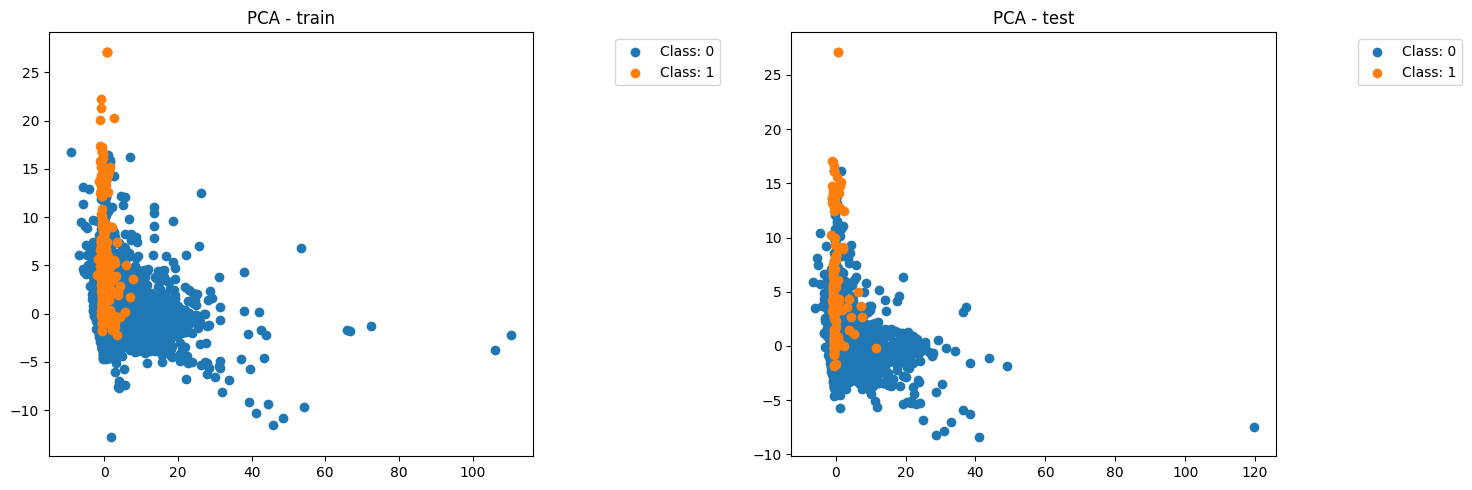

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('PCA - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_pca[y_train == label, 0], train_pca[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('PCA - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_pca[y_test == label, 0], test_pca[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - t-SNE
* PCA후에 t-sne나 UMAP을 해야하는 이유
* 계산 효율성을 높이고, 데이터의 노이즈를 줄이며, t-SNE나 UMAP의 결과를 개선하는 데 도움을 줄 수 있다.




In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=10, n_iter=300)
train_tsne = tsne.fit_transform(train_pca)
test_tsne = tsne.fit_transform(test_pca)
print(train_tsne.shape, test_tsne.shape)

(199364, 2) (85443, 2)


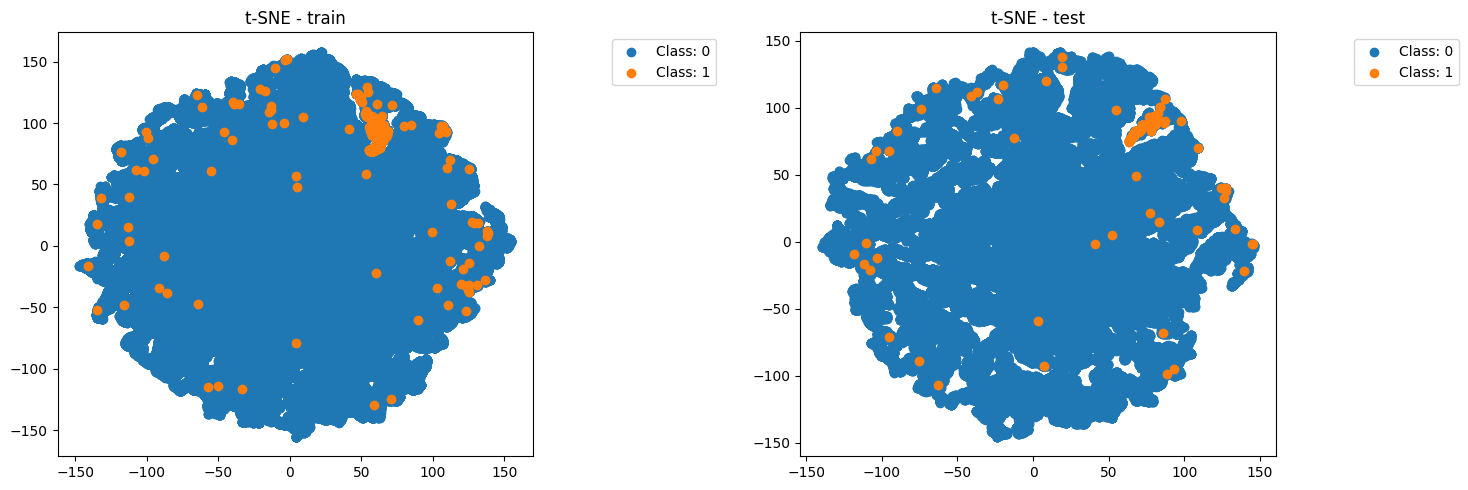

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('t-SNE - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_tsne[y_train == label, 0], train_tsne[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_tsne[y_test == label, 0], test_tsne[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import umap
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, random_state=100)
train_umap = umap_model.fit_transform(train_pca)
test_umap = umap_model.transform(test_pca)
print(train_umap.shape, test_umap.shape)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(199364, 2) (85443, 2)


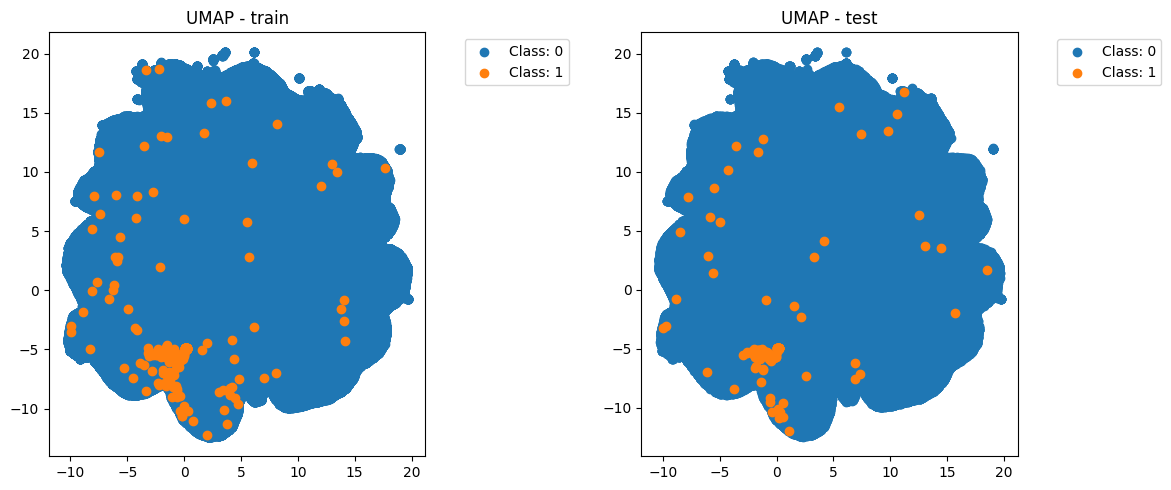

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title('UMAP - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_umap[y_train == label, 0], train_umap[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('UMAP - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_umap[y_test == label, 0], test_umap[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

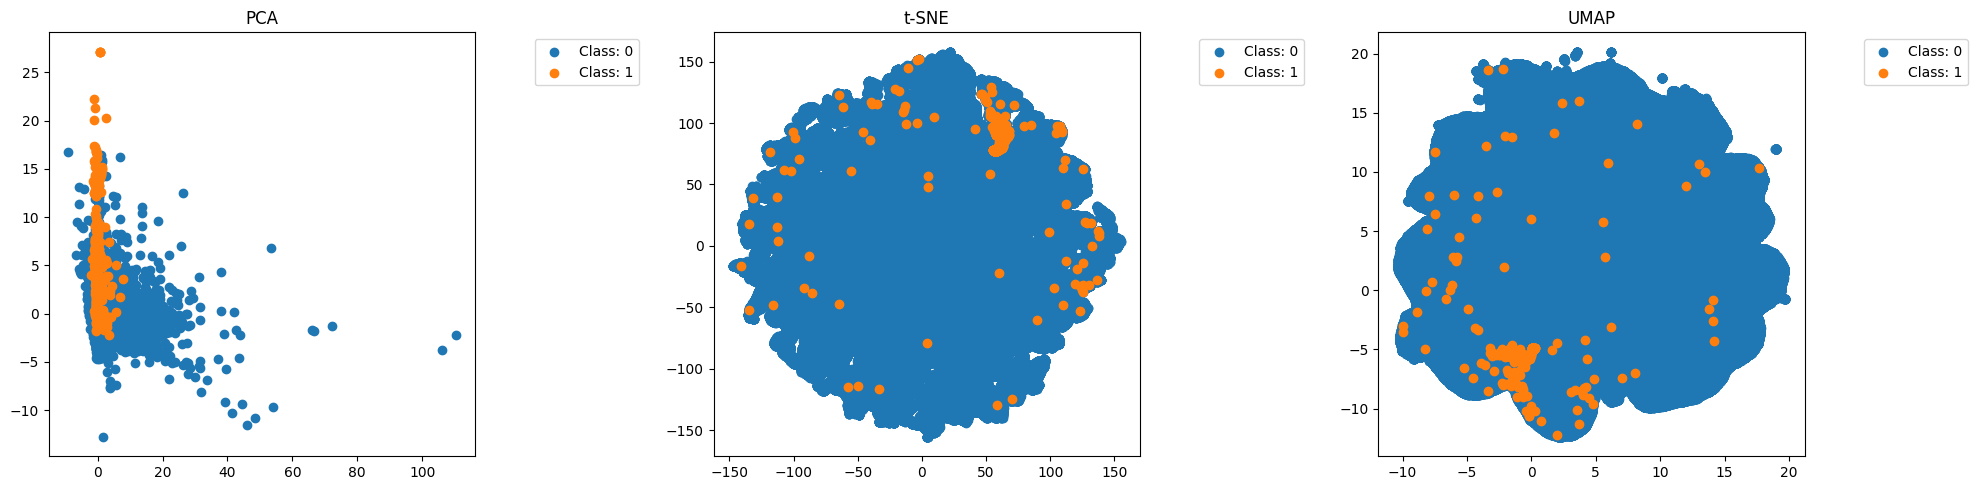

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].set_title('PCA')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_pca[y_train == label, 0], train_pca[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE')
for label in sorted(y_train.unique()):
    axes[1].scatter(train_tsne[y_train == label, 0], train_tsne[y_train == label, 1], label='Class: {}'.format(label))

axes[2].set_title('UMAP')
for label in sorted(y_train.unique()):
    axes[2].scatter(train_umap[y_train == label, 0], train_umap[y_train == label, 1],label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[2].legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt.tight_layout()
plt.show()

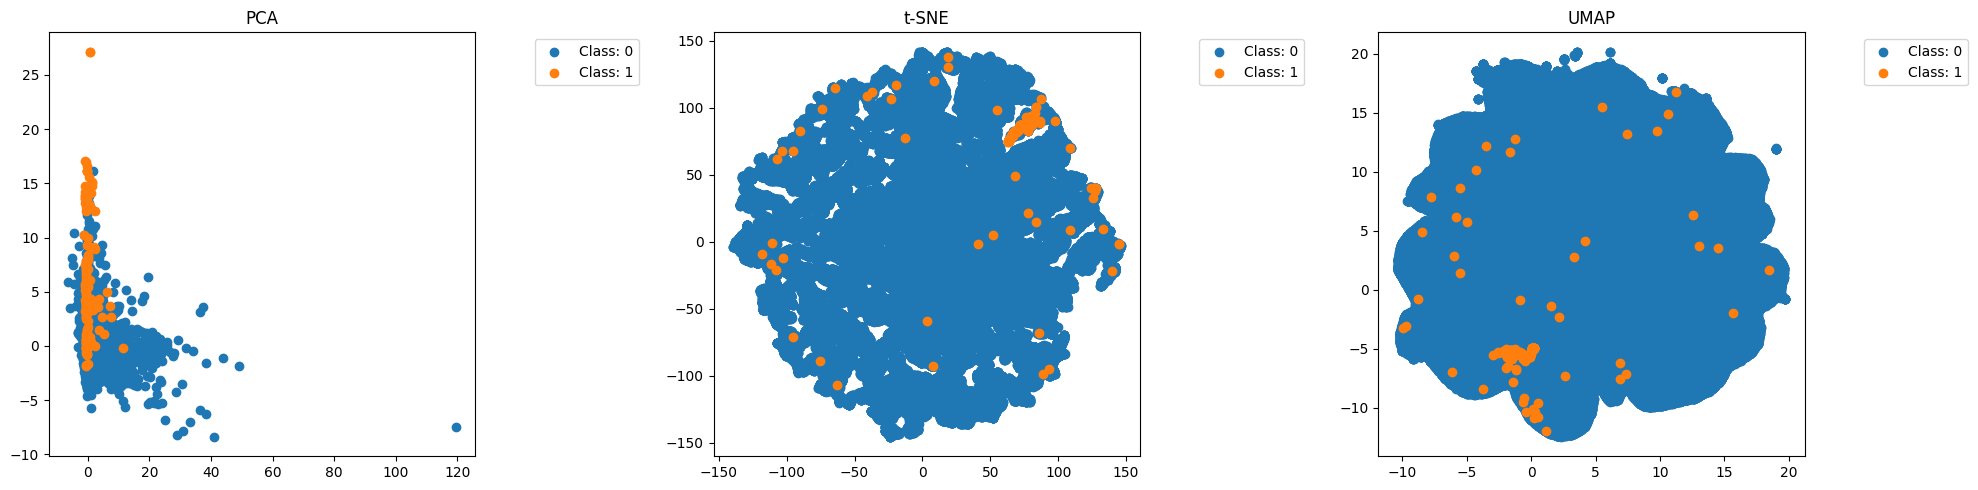

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].set_title('PCA')
for label in sorted(y_test.unique()):
    axes[0].scatter(test_pca[y_test == label, 0], test_pca[y_test == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_tsne[y_test == label, 0], test_tsne[y_test == label, 1], label='Class: {}'.format(label))

axes[2].set_title('UMAP')
for label in sorted(y_test.unique()):
    axes[2].scatter(test_umap[y_test == label, 0], test_umap[y_test == label, 1],label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[2].legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt.tight_layout()
plt.show()